In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Scikit learn misc. imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score  # using version .18
from sklearn.metrics import roc_curve, roc_auc_score

# Scikit learn model imports
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# XGBoost
import xgboost as xgb

# Stats models
import statsmodels.api as sm


%matplotlib inline

### Get data first - Iris Data

In [77]:
# Take only the last two classes to make it a binary classification problem
iris = datasets.load_iris()
X = pd.DataFrame(iris.data[50:,:])
Y = pd.DataFrame(iris.target[50:]) - 1

#### Split into training and test set

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

### Metric Functions

In [81]:
def metrics(model, X_train, y_train, y_test, model_scores):
    # k-fold validation
    scores = cross_val_score(model, X_train, y_train.values.flatten(), cv=10)
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
    # AUC
#     auc = roc_auc_score(y_test.values.flatten(), model_scores) # model scores should be the probability of the positive class
#     print(auc)
    
#     # Plot ROC curve
#     fpr, tpr, thresholds = roc_curve(y_test.values.flatten(), model_scores, pos_label=1)

#     plt.figure()
#     lw = 2
#     plt.plot(fpr, tpr, color='darkorange',label='ROC curve (AUC = %0.2f)' % auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC')
#     plt.legend( loc="lower right")
#     plt.show()
    
    
    

# Classification

### Logistic Regression

#### Stats models version

In [25]:
clf = sm.Logit(y_train, X_train)

  # fit the model
result = clf.fit()

PerfectSeparationError: Perfect separation detected, results not available

In [30]:
print result.summary()

NameError: name 'result' is not defined

In [217]:
result.predict(X_test)

0    1.331004e-21
dtype: float64

#### Scikit learn version

In [79]:
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
clf = clf.fit(X_train, y_train.values.flatten())

In [66]:
clf.predict(X_test)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [83]:
metrics(clf, X_train, y_train, y_test, clf.predict_proba(X_test)[:,1])

[1.         1.         1.         1.         1.         1.
 0.83333333 1.         1.         1.        ]
Accuracy: 0.98 (+/- 0.10)


### Decision Tree

In [68]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [69]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1])

[1.         1.         1.         1.         1.         1.
 0.83333333 1.         1.         0.8       ]
Accuracy: 0.96 (+/- 0.15)
0.7225063938618925


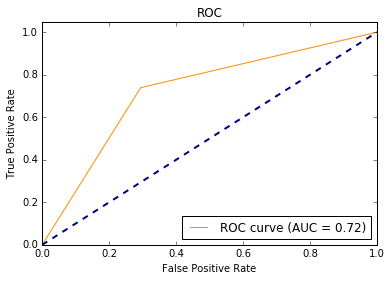

In [70]:
metrics(clf, X_train, y_train, y_test, clf.predict_proba(X_test)[:,1])

## Ensembles

### Random Forrest

In [45]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train.values.flatten())

In [46]:
# the class labels
clf.classes_

array([0, 1])

In [47]:
clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

[1.         1.         1.         1.         1.         1.
 0.83333333 1.         1.         1.        ]
Accuracy: 0.98 (+/- 0.10)
0.9258312020460358


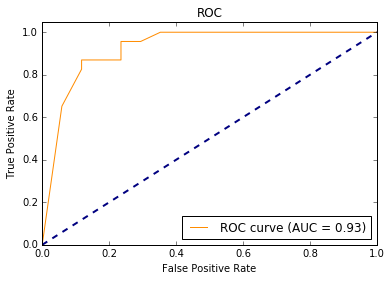

In [48]:
metrics(clf, X_train, y_train, y_test, clf.predict_proba(X_test)[:,1])

### AdaBoost

In [49]:
clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit(X_train,y_train.values.flatten())

In [50]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

[1.         1.         1.         1.         1.         1.
 0.83333333 1.         1.         0.8       ]
Accuracy: 0.96 (+/- 0.15)
0.8823529411764706


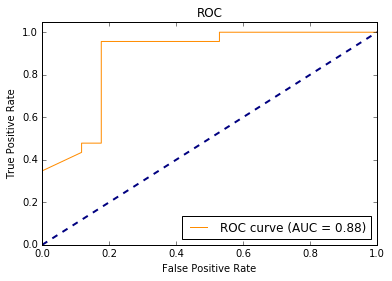

In [51]:
metrics(clf, X_train, y_train, y_test, clf.predict_proba(X_test)[:,1])

### Gradient Boosting

In [52]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf = clf.fit(X_train,y_train.values.flatten())

In [53]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

[1.         1.         1.         1.         1.         1.
 0.83333333 1.         1.         0.8       ]
Accuracy: 0.96 (+/- 0.15)
0.8452685421994885


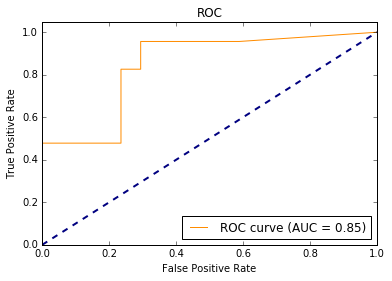

In [54]:
metrics(clf, X_train, y_train, y_test, clf.predict_proba(X_test)[:,1])

### XGBoost

In [60]:
clf = xgb.XGBClassifier()
clf = clf.fit(X_train,y_train.values.flatten())

In [61]:
clf.predict(X_test)

/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

[1.         1.         1.         1.         1.         1.
 0.83333333 1.         1.         1.        ]
Accuracy: 0.98 (+/- 0.10)
0.8976982097186701


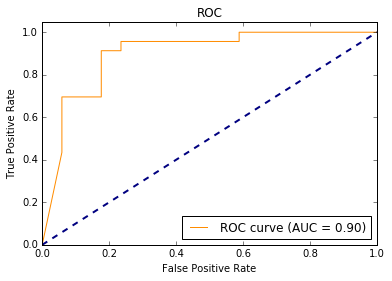

In [62]:
metrics(clf, X_train, y_train, y_test, clf.predict_proba(X_test)[:,1])

### Voting

In [74]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='soft')
eclf = eclf.fit(X_train,y_train.values.flatten())

In [75]:
eclf.predict(X_test)

/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

[1.         1.         1.         1.         1.         1.
 0.83333333 1.         1.         1.        ]
Accuracy: 0.98 (+/- 0.10)
0.9411764705882353


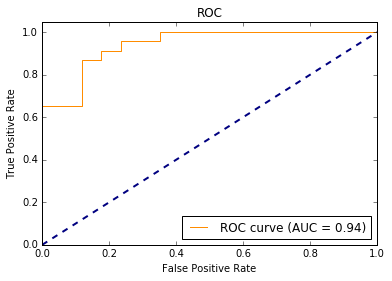

In [76]:
metrics(eclf, X_train, y_train, y_test, eclf.predict_proba(X_test)[:,1])

NameError: name 'cm' is not defined

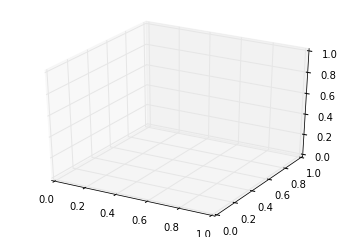

In [85]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
# ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()


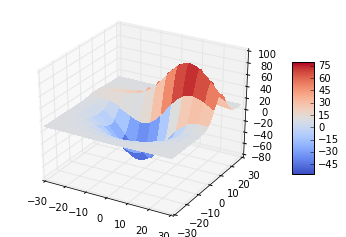

In [90]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X, Y, Z = axes3d.get_test_data(0.05)
Z = Z+10

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
